In [1]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import *
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
%matplotlib inline
import os, pickle 
#"""

from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#"""

import warnings
warnings.filterwarnings("ignore")

In [7]:
def cal_r_twostream(tau, a=0.0, g=0.85, mu=1.0):

    """
    Two-stream approximation of reflectance (no absorption)

    Input:
        tau: optical thickness
        a: surface albedo
        g: asymmetry parameter
        mu: cosine of solar zenith angle

    Output:
        Reflectance
    """

    x = 2.0 * mu / (1.0-g) / (1.0-a)
    r = (tau + a*x) / (tau + x)

    return r

In [8]:
a0         = 0.4#np.nanmedian(sfc_alb_inter)
mu0        = np.cos(np.deg2rad(45))# np.cos(np.deg2rad(sza1.mean()))

xx_2stream = np.linspace(0.0, 200.0, 10000)
yy_2stream = cal_r_twostream(xx_2stream, a=a0, mu=mu0)

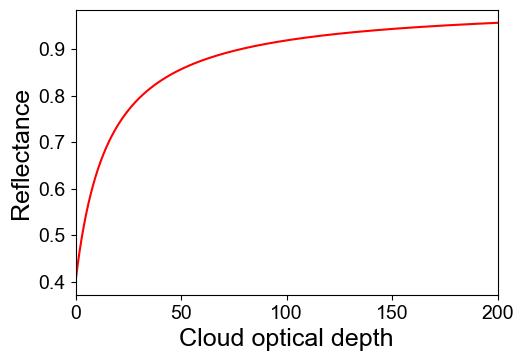

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 36/8), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 18
legend_size = 16
tick_size = 14


x = xx_2stream
y = yy_2stream

ax.plot(x, y, 'r')


#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = x.min(), x.max()
#ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
# ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

# ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('Cloud optical depth', fontsize=label_size)
ax.set_ylabel('Reflectance', fontsize=label_size)
# ax.set_title('title', fontsize=title_size)

plt.show()